In [1]:
import numpy as np
import os
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('data/Albums')

In [3]:
def clean_lyrics(lyrics, pattern):
    cleaned_lyrics = [verse.rstrip('\n') for verse in lyrics]
    cleaned_lyrics = [re.sub(pattern, '', verse) for verse in cleaned_lyrics]
    cleaned_lyrics = [verse for verse in cleaned_lyrics[1:] if not verse.startswith('[') and not verse.endswith(']') and verse != '']
    return " ".join(cleaned_lyrics)

In [4]:
albuns = [album for album in os.listdir() if album != '.DS_Store']
pattern = r'\d+\s*Embed$'
lyrics_list = []
stopwords = set(STOPWORDS)
stopwords.add('OH')

for album in albuns:
    os.chdir(album)
    songs = os.listdir()
    for song in songs:
        with open(song, 'r', encoding='utf-8') as file:
            lyrics = file.readlines()
            cleaned_lyrics = clean_lyrics(lyrics, pattern)
            lyrics_list.append(cleaned_lyrics)
    os.chdir('..')

In [5]:
all_lyrics = " ".join(lyrics_list)

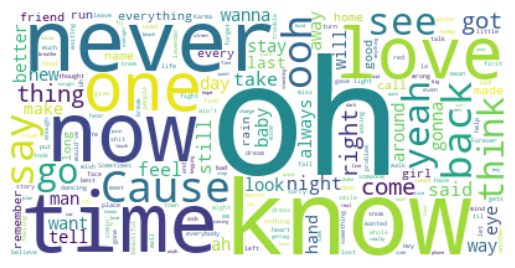

In [6]:
# Creates wordcloud object
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_lyrics)

# Display the wordcloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
os.chdir('..')

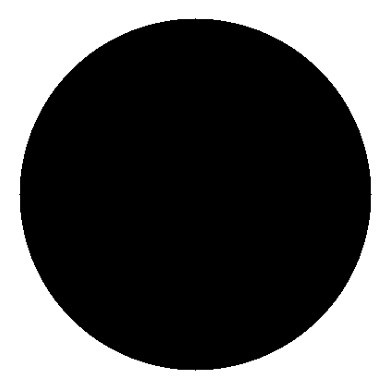

In [8]:
# Create a blank white image with the desired size
width, height = 400, 400  # Adjust these dimensions as needed
mask = np.zeros((height, width), dtype=np.uint8) * 255

# Create a mesh grid to represent the coordinates
x, y = np.ogrid[:height, :width]

# Create a circular mask where all pixels outside the circle are set to 0
center_x, center_y = width // 2, height // 2
radius = min(center_x, center_y) - 10  # Adjust the radius as needed
mask[(x - center_x) ** 2 + (y - center_y) ** 2 > radius**2] = 1

# Display the circular mask (optional)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

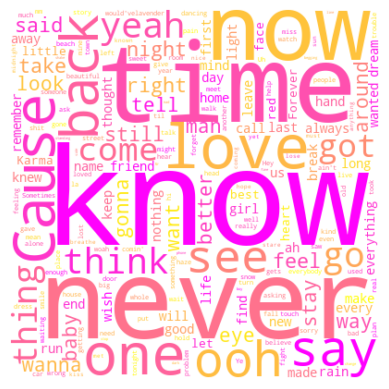

In [9]:
circle_wordcloud = WordCloud(collocations = False,
                             mask = mask,
                             background_color = 'white', 
                             stopwords = stopwords,
                             colormap='spring').generate(all_lyrics)

plt.imshow(circle_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

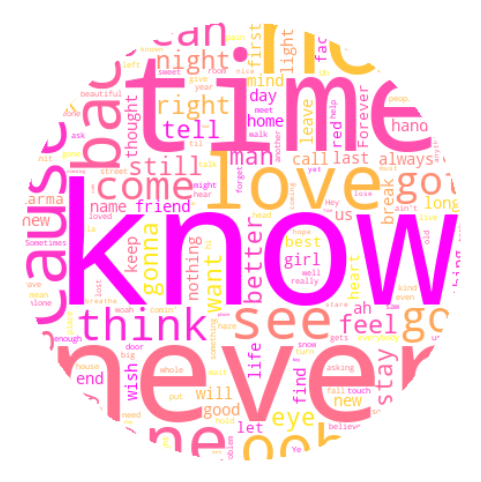

In [10]:
# Clip the Word Cloud to the circular mask
wordcloud_array = np.array(circle_wordcloud)

# Apply the circular mask
wordcloud_array[mask == 1] = 255 # Set the background to white

# Display the Word Cloud within the circular mask
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_array, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Saving to PNG
circle_wordcloud.to_file('ts_lyrics_wordcloud.png');